In [1]:
# =======================================
# METALLURGICA 2025
# Author: Harry
# =======================================

# 📚 Libraries and datasets/csvs etc.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

trainedDS=pd.read_csv("/kaggle/input/metallurgicaa/train.csv")
trainedDS

testDS=pd.read_csv("/kaggle/input/metallurgicaa/test.csv")
testDS

,ID,Alloy formula,Alloy class,Cu,Al,Ag,B,Be,Ca,Co,...,Tss (K),tss (h),CR reduction (%),Aging,Tag (K),tag (h),Secondary thermo-mechanical process,Hardness (HV),Yield strength (MPa),Ultimate tensile strength (MPa)
0,1861,Cu-3.2Ni-0.40Si,Cu-Ni-Si alloys,95.396447,0.004232,0.000000,0.001769,0.000000,0,0.000000,...,1247.973145,4.128741,3.494600,Y,830.206526,0.352046,N,290.251916,NaN,NaN
1,354,Cu-3Ti-2Mg,Cu low alloyed,96.312697,0.018812,0.000000,0.000000,0.018160,0,0.000000,...,1323.000000,3.900599,4.753762,Y,772.854817,3.655597,N,222.375464,573.084407,NaN
2,1334,Cu-6Ni-1.4Si-0.15Mg-0.1Cr,Cu-Ni-Si alloys,98.498992,0.024675,0.000000,0.000000,0.000000,0,0.000000,...,1244.645546,4.077248,1.984943,Y,524.100551,NaN,N,232.931087,NaN,NaN
3,906,Cu-3.2Ni-0.7Si-0.3Zn,Cu low alloyed,95.490025,0.000000,0.000000,0.000000,0.000240,0,0.000000,...,1251.789869,1.905422,3.522955,N,783.153292,6.221667,N,223.454698,NaN,NaN
4,1290,Cu-6Ni-1.4Si-0.15Mg-0.1Cr,Cu low alloyed,99.840000,0.017763,0.001110,0.000000,1.431413,0,0.000000,...,1279.222142,2.179339,55.138650,Y,775.752445,6.026074,N,215.774428,NaN,692.177215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,966,Cu-6Ni-1Si-0.5Al,Cu-Ti alloys,96.688248,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,1164.275352,2.379618,75.207874,Y,722.395455,4.316116,N,186.767430,NaN,NaN
394,1285,Cu-0.28Cr-0.19Mg,Cu-Ni-Si alloys,92.596762,0.500000,0.001293,0.000000,0.000000,0,0.000000,...,1261.492753,3.557466,4.977769,Y,670.440286,0.000000,N,398.020921,NaN,687.520692
395,1740,Cu-6Ni-1Si-0.5Al,Cu-Ni-Si alloys,98.411584,0.014715,0.003174,0.000000,0.015633,0,0.883876,...,1201.543007,1.137809,86.010802,Y,731.973950,26.961865,N,171.630534,NaN,NaN
396,262,Cu-0.1Ag0.3Cr,Cu-Be alloys,96.476152,0.026034,0.000000,0.000000,0.000000,0,0.000000,...,1229.338819,1.315765,0.000000,Y,784.102467,3.570684,N,114.134361,NaN,NaN


In [2]:
trainedDS.isnull().sum()

ID                                        0
Alloy formula                             0
Alloy class                               0
Cu                                        0
Al                                        0
Ag                                        0
B                                         0
Be                                        0
Ca                                        0
Co                                        0
Ce                                        0
Cr                                        0
Fe                                        0
Hf                                        0
La                                        0
Mg                                        0
Mn                                        0
Mo                                        0
Nb                                        0
Nd                                        0
Ni                                        0
P                                         0
Pb                              

In [3]:
trainedDS.drop(columns=['Alloy formula','Alloy class']) #because too many missing values(1440, 1353 respectively here)

,ID,Cu,Al,Ag,B,Be,Ca,Co,Ce,Cr,...,tss (h),CR reduction (%),Aging,Tag (K),tag (h),Secondary thermo-mechanical process,Hardness (HV),Yield strength (MPa),Ultimate tensile strength (MPa),Electrical conductivity (%IACS)
0,969,95.557137,0.246150,0.000075,0.000000,0.000000,0,0.000000,0.000000,0.018083,...,3.972130,4.366903,Y,778.447643,4.447236,N,163.585875,NaN,NaN,22.067010
1,241,95.083982,0.001252,0.000000,0.000000,0.000947,0,0.000000,0.000000,0.447724,...,NaN,90.214778,Y,NaN,0.000000,N,300.692142,567.094341,NaN,43.761314
2,820,91.894209,0.022183,0.000000,0.003260,0.000000,0,0.008681,0.000000,0.125856,...,4.064446,0.243155,Y,637.878753,0.887991,N,327.858374,NaN,NaN,36.114651
3,693,92.624741,0.000000,0.000000,0.000000,0.015469,0,0.000438,0.000000,0.093240,...,7.041734,0.000000,Y,772.859083,0.535209,Y,331.311269,NaN,NaN,26.008459
4,421,95.575242,0.009056,0.000000,0.000000,0.008676,0,0.000000,0.000000,0.011448,...,27.770000,0.000000,Y,768.312615,NaN,N,83.737011,NaN,NaN,29.370901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1131,95.941854,0.000000,0.000000,0.002821,0.001406,0,0.000000,0.000000,0.016888,...,1.410631,1.272590,Y,NaN,4.429601,N,211.533052,NaN,685.381376,18.464297
1596,1295,91.912041,0.000000,0.000000,0.000000,0.003993,0,0.006625,0.000000,0.017541,...,1.998773,1.601684,Y,721.275953,NaN,N,238.714120,571.617783,NaN,18.483458
1597,861,96.183297,0.015976,0.000000,0.000691,1.659289,0,0.000000,0.000000,0.112887,...,4.271199,78.747295,Y,987.717781,NaN,Y,377.043937,NaN,NaN,20.359770
1598,1460,99.661586,0.012675,0.000000,0.002091,0.009160,0,0.000000,0.002115,0.009335,...,2.206697,0.000000,Y,546.983760,0.384645,Y,91.214066,NaN,459.704474,27.129810


In [4]:
print(trainedDS['tss (h)'].dtype)
print(trainedDS['Tss (K)'].dtype)
print(trainedDS['tag (h)'].dtype)
print(trainedDS['Tag (K)'].dtype)
print(trainedDS['Hardness (HV)'].dtype)
print(trainedDS['Aging'].dtype)
print(trainedDS['Secondary thermo-mechanical process'].dtype)

float64
float64
float64
float64
float64
object
object


In [5]:
#check for outlier

import numpy as np

number_columns = ['Tss (K)', 'tss (h)', 'Tag (K)', 'tag (h)', 'Hardness (HV)']

outliers = {}

for col in number_columns:
    Q1 = trainedDS[col].quantile(0.25)
    Q3 = trainedDS[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((trainedDS[col] < lower_bound) | (trainedDS[col] > upper_bound)).sum()
    outliers[col] = outliers_count

print("Outliers per column:", outliers)

Outliers per column: {'Tss (K)': 81, 'tss (h)': 19, 'Tag (K)': 126, 'tag (h)': 132, 'Hardness (HV)': 0}


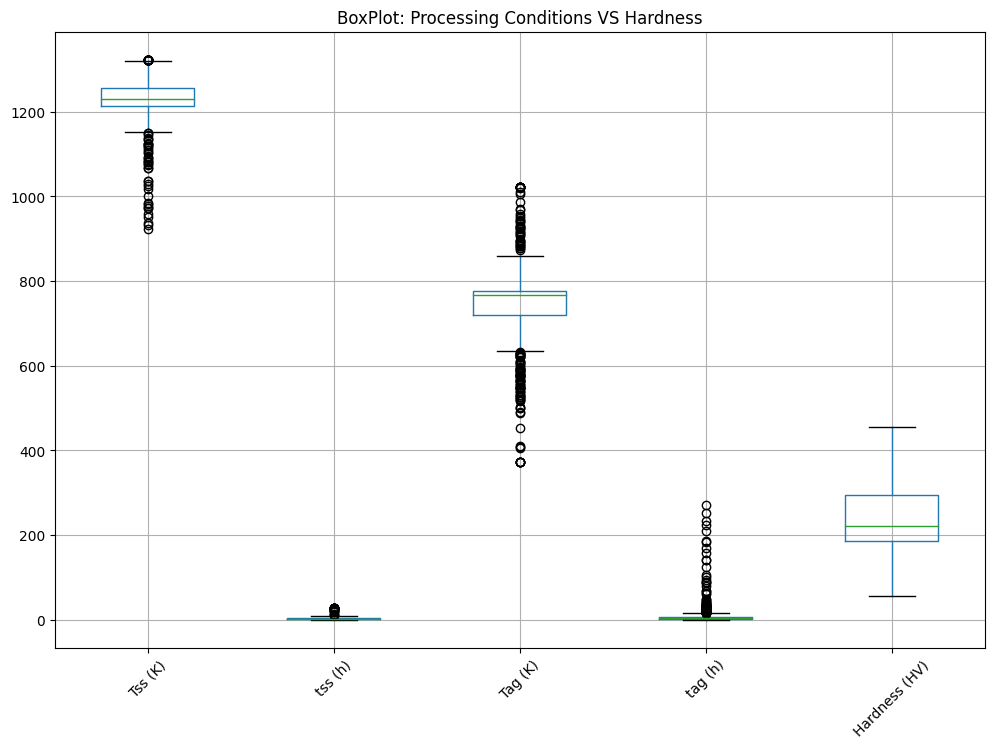

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
trainedDS[number_columns].boxplot()
plt.xticks(rotation=45)
plt.title("BoxPlot: Processing Conditions VS Hardness")
plt.show()

Outlier count per column: {'Tss (K)': 81, 'tss (h)': 19, 'Tag (K)': 126, 'tag (h)': 132, 'Hardness (HV)': 0}

Since Tss (K), tss (h), Tag (K), tag (h), and Hardness (HV) are continuous numerical variables, we can fill them with either:

Mean (if data is normally distributed)

Median (if data has outliers)

In [7]:
number_columns = ['Tss (K)', 'tss (h)', 'Tag (K)', 'tag (h)']
trainedDS[number_columns] = trainedDS[number_columns].fillna(trainedDS[number_columns].median())


trainedDS

trainedDS.dropna(subset=['Electrical conductivity (%IACS)'], inplace=True)
#Since the target variable has only 2 missing values, we have two options:Drop rows with missing target values (if only a few missing).

trainedDS['Hardness (HV)'] = trainedDS['Hardness (HV)'].fillna(trainedDS['Hardness (HV)'].mean())

#If no significant outliers, use mean for missing values

trainedDS['Hardness (HV)'].isnull().sum()

#Since "Secondary thermo-mechanical process" is a categorical column with values "Y" (Yes) and "N" (No), the best way to handle missing values is to fill them with the most frequent value (mode).

trainedDS['Secondary thermo-mechanical process'] = trainedDS['Secondary thermo-mechanical process'].fillna(trainedDS['Secondary thermo-mechanical process'].mode()[0])



trainedDS['Secondary thermo-mechanical process'].isnull().sum()

trainedDS.drop(columns=['Yield strength (MPa)', 'Ultimate tensile strength (MPa)'], inplace=True)


trainedDS.isnull().sum()#cleaned data with all missing values filled 

trainedDS = pd.get_dummies(trainedDS, columns=['Alloy class', 'Secondary thermo-mechanical process','Aging'], drop_first=True)


trainedDS

trainedDS.drop(columns=['Alloy formula'], inplace=True)

trainedDS

trainedDS

# Define X (features) and y (target)
X_train = trainedDS.drop(columns=['Electrical conductivity (%IACS)'])  # Drop target variable
y_train = trainedDS['Electrical conductivity (%IACS)']  # Target variable

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_train)

# Calculate MAE
lr_mae = mean_absolute_error(y_train, lr_pred)
print(f"Linear Regression MAE: {lr_mae:.4f}")

Linear Regression MAE: 13.6708


In [9]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_mae = mean_absolute_error(y_train, ridge.predict(X_train))

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_mae = mean_absolute_error(y_train, lasso.predict(X_train))

print(f"Ridge Regression MAE: {ridge_mae:.4f}")
print(f"Lasso Regression MAE: {lasso_mae:.4f}")

Ridge Regression MAE: 13.7139
Lasso Regression MAE: 13.7319


In [10]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_mae = mean_absolute_error(y_train, dt.predict(X_train))

print(f"Decision Tree MAE: {dt_mae:.4f}")

Decision Tree MAE: 12.3516


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_mae = mean_absolute_error(y_train, rf.predict(X_train))

print(f"Random Forest MAE: {rf_mae:.4f}")

Random Forest MAE: 7.9457


In [12]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1200, learning_rate=0.008, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_mae = mean_absolute_error(y_train, xgb_model.predict(X_train))

print(f"XGBoost MAE: {xgb_mae:.4f}")

XGBoost MAE: 6.1039


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Split data into train (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model2 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model2.fit(X_train, y_train)


# Validate model on unseen data
y_valid_pred = xgb_model2.predict(X_valid)
xgb_mae = mean_absolute_error(y_valid, y_valid_pred)
print(f"Validation MAE: {xgb_mae:.4f}")  # This is the real MAE to optimize!


testDS

testDS['Hardness (HV)'] = testDS['Hardness (HV)'].fillna(testDS['Hardness (HV)'].mean())
testDS['Secondary thermo-mechanical process'] = testDS['Secondary thermo-mechanical process'].fillna(testDS['Secondary thermo-mechanical process'].mode()[0])
testDS.drop(columns=['Yield strength (MPa)', 'Ultimate tensile strength (MPa)'], inplace=True)
testDS = pd.get_dummies(testDS, columns=['Alloy class', 'Secondary thermo-mechanical process','Aging'], drop_first=True)

#If no significant outliers, use mean for missing values

number_columns = ['Tss (K)', 'tss (h)', 'Tag (K)', 'tag (h)']
testDS[number_columns] = testDS[number_columns].fillna(testDS[number_columns].median())


testDS.isnull().sum()

testDS.drop(columns=['Alloy formula'], inplace=True)

testDS

trainedDS

Validation MAE: 14.0323


,ID,Cu,Al,Ag,B,Be,Ca,Co,Ce,Cr,...,CR reduction (%),Tag (K),tag (h),Hardness (HV),Electrical conductivity (%IACS),Alloy class_Cu-Be alloys,Alloy class_Cu-Ni-Si alloys,Alloy class_Cu-Ti alloys,Secondary thermo-mechanical process_Y,Aging_Y
0,969,95.557137,0.246150,0.000075,0.000000,0.000000,0,0.000000,0.000000,0.018083,...,4.366903,778.447643,4.447236,163.585875,22.067010,False,False,False,False,True
1,241,95.083982,0.001252,0.000000,0.000000,0.000947,0,0.000000,0.000000,0.447724,...,90.214778,766.723429,0.000000,300.692142,43.761314,False,True,False,False,True
2,820,91.894209,0.022183,0.000000,0.003260,0.000000,0,0.008681,0.000000,0.125856,...,0.243155,637.878753,0.887991,327.858374,36.114651,False,True,False,False,True
3,693,92.624741,0.000000,0.000000,0.000000,0.015469,0,0.000438,0.000000,0.093240,...,0.000000,772.859083,0.535209,331.311269,26.008459,False,True,False,True,True
4,421,95.575242,0.009056,0.000000,0.000000,0.008676,0,0.000000,0.000000,0.011448,...,0.000000,768.312615,2.864351,83.737011,29.370901,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1131,95.941854,0.000000,0.000000,0.002821,0.001406,0,0.000000,0.000000,0.016888,...,1.272590,766.723429,4.429601,211.533052,18.464297,False,True,False,False,True
1596,1295,91.912041,0.000000,0.000000,0.000000,0.003993,0,0.006625,0.000000,0.017541,...,1.601684,721.275953,2.864351,238.714120,18.483458,False,True,False,False,True
1597,861,96.183297,0.015976,0.000000,0.000691,1.659289,0,0.000000,0.000000,0.112887,...,78.747295,987.717781,2.864351,377.043937,20.359770,False,True,False,True,True
1598,1460,99.661586,0.012675,0.000000,0.002091,0.009160,0,0.000000,0.002115,0.009335,...,0.000000,546.983760,0.384645,91.214066,27.129810,False,False,True,True,True


In [14]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=32,
    learning_rate='adaptive',
    max_iter=500,
    random_state=42
)

nn_model.fit(X_train, y_train)

y_valid_pred = nn_model.predict(X_valid)
nn_mae = mean_absolute_error(y_valid, y_valid_pred)
print(f"Neural Network Validation MAE: {nn_mae:.4f}")

Neural Network Validation MAE: 15.4751


In [15]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

xgb_model3 = xgb.XGBRegressor(
    n_estimators=1200,        # More boosting rounds (helps with low learning rates)
    learning_rate=0.008,      # Even lower learning rate (better generalization)
    max_depth=7,              # Slightly deeper trees to capture complex patterns
    subsample=0.8,            # Use 80% of training data for each tree (reduces overfitting)
    colsample_bytree=0.8,     # Use 80% of features per tree (avoids redundancy)
    reg_alpha=0.05,           # L1 Regularization (helps feature selection)
    reg_lambda=2.0,           # L2 Regularization (reduces model complexity)
    gamma=0.3,                # Min loss reduction for split (avoids unnecessary splits)
    min_child_weight=6,       # Helps prevent overfitting from small noisy splits
    random_state=42,
    tree_method="hist",       # Faster training with histogram-based approach
    early_stopping_rounds=50  # Stops training if no improvement in 50 rounds
)

xgb_model3.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=100)

y_train_pred = xgb_model.predict(X_train)
y_valid_pred = xgb_model.predict(X_valid)

xgb_mae_train = mean_absolute_error(y_train, y_train_pred)
xgb_mae_valid = mean_absolute_error(y_valid, y_valid_pred)

print(f"Optimized XGBoost MAE (Train): {xgb_mae_train:.4f}")
print(f"Optimized XGBoost MAE (Validation): {xgb_mae_valid:.4f}")

[0]	validation_0-rmse:18.04317
[100]	validation_0-rmse:17.65726
[200]	validation_0-rmse:17.57304
[300]	validation_0-rmse:17.55771
[365]	validation_0-rmse:17.56126
Optimized XGBoost MAE (Train): 6.0939
Optimized XGBoost MAE (Validation): 6.1437


In [16]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# SVR requires standardized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

svr_model = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

y_valid_pred = svr_model.predict(X_valid_scaled)
svr_mae = mean_absolute_error(y_valid, y_valid_pred)
print(f"SVR MAE: {svr_mae:.4f}")

SVR MAE: 14.5884


In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=10, weights='distance', p=2)
knn_model.fit(X_train, y_train)

y_valid_pred = knn_model.predict(X_valid)
knn_mae = mean_absolute_error(y_valid, y_valid_pred)
print(f"KNN Regressor MAE: {knn_mae:.4f}")

KNN Regressor MAE: 15.1558


In [18]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Further optimized XGBoost model
xgb_model5 = xgb.XGBRegressor(
    n_estimators=5000,         # More boosting rounds (helps with low learning rates)
    learning_rate=0.008,       # Even lower learning rate (better generalization)
    max_depth=9,               # Slightly deeper trees to capture complex patterns
    subsample=0.9,             # Use 90% of training data for each tree (reduces overfitting)
    colsample_bytree=0.9,      # Use 90% of features per tree (avoids redundancy)
    reg_alpha=0.2,             # Increased L1 Regularization (helps feature selection)
    reg_lambda=4.0,            # Stronger L2 Regularization (reduces model complexity)
    gamma=0.5,                 # Increased min loss reduction for split (avoids unnecessary splits)
    min_child_weight=10,       # More weight needed for leaf node to avoid overfitting
    random_state=60,
    tree_method="hist",        # Best method for CPU
    early_stopping_rounds=150  # Stops training if no improvement in 150 rounds
)

xgb_model5.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric="mae", verbose=100)

y_train_pred = xgb_model5.predict(X_train)
y_valid_pred = xgb_model5.predict(X_valid)

xgb_mae_train = mean_absolute_error(y_train, y_train_pred)
xgb_mae_valid = mean_absolute_error(y_valid, y_valid_pred)

print(f"Further Optimized XGBoost MAE (Train): {xgb_mae_train:.4f}")
print(f"Further Optimized XGBoost MAE (Validation): {xgb_mae_valid:.4f}")

[0]	validation_0-mae:14.40661
[100]	validation_0-mae:14.13824
[200]	validation_0-mae:13.98665
[300]	validation_0-mae:14.00011
[375]	validation_0-mae:14.04919
Further Optimized XGBoost MAE (Train): 8.7170
Further Optimized XGBoost MAE (Validation): 13.9556


In [19]:
from catboost import CatBoostRegressor

# cat_model = CatBoostRegressor(
#     iterations=3000, learning_rate=0.008, depth=7,
#     l2_leaf_reg=3, loss_function='MAE', random_seed=42,
#     verbose=100
# )

cat_model = CatBoostRegressor(
    iterations=2900,                 # More boosting rounds (with early stopping)
    learning_rate=0.008,             # Lower learning rate for better generalization
    depth=7,                         # Slightly deeper trees
    l2_leaf_reg=3,                   # More regularization
    loss_function='MAE',            
    random_seed=42,
    verbose=100,
    bootstrap_type='Bayesian',       # Smarter bootstrapping improves generalization
    bagging_temperature=0.3,         # Controls randomness (lower = more stable)
)


cat_model.fit(X_train, y_train, eval_set=(X_valid, y_valid))
y_valid_pred = cat_model.predict(X_valid)
print(f"CatBoost MAE: {mean_absolute_error(y_valid, y_valid_pred):.4f}")

from sklearn.model_selection import cross_val_score

# mae = -cross_val_score(cat_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
# print("Estimated MAE (CV):", mae)


0:	learn: 13.7059574	test: 14.3077759	best: 14.3077759 (0)	total: 65.1ms	remaining: 3m 8s
100:	learn: 12.5989964	test: 14.1530322	best: 14.1473712 (99)	total: 675ms	remaining: 18.7s
200:	learn: 11.6771327	test: 14.0394063	best: 14.0394063 (200)	total: 1.29s	remaining: 17.3s
300:	learn: 10.9291067	test: 13.9452316	best: 13.9443292 (299)	total: 1.92s	remaining: 16.6s
400:	learn: 10.2911460	test: 13.9145501	best: 13.9110934 (394)	total: 2.53s	remaining: 15.8s
500:	learn: 9.7471130	test: 13.8967956	best: 13.8894489 (496)	total: 3.15s	remaining: 15.1s
600:	learn: 9.2743091	test: 13.8683669	best: 13.8683669 (600)	total: 3.76s	remaining: 14.4s
700:	learn: 8.8414150	test: 13.8585824	best: 13.8585824 (700)	total: 4.38s	remaining: 13.7s
800:	learn: 8.4588905	test: 13.8474696	best: 13.8474696 (800)	total: 4.99s	remaining: 13.1s
900:	learn: 8.1049323	test: 13.8460110	best: 13.8436083 (896)	total: 5.65s	remaining: 12.5s
1000:	learn: 7.7763404	test: 13.8266782	best: 13.8238939 (992)	total: 6.26s	rem

In [27]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_absolute_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

for train_idx, val_idx in kf.split(X_train):  # Use X_train instead of X
    X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # model7 = CatBoostRegressor(
    #     iterations=2000, learning_rate=0.008, depth=7,
    #     l2_leaf_reg=3, loss_function='MAE', random_seed=42,
    #     early_stopping_rounds=100, verbose=100
    # )

    # model7 = CatBoostRegressor(
    # iterations=4000,                 # Allow more iterations for better learning
    # learning_rate=0.0045,            # Smaller LR for smoother convergence
    # depth=9,                         # Increased depth = more complex relationships
    # l2_leaf_reg=6,                   # More regularization to reduce overfitting
    # loss_function='MAE',            
    # eval_metric='MAE',              # Explicit evaluation metric
    # early_stopping_rounds=100,
    # random_seed=42,
    # verbose=100,
    # bootstrap_type='Bayesian',       # Smarter sampling
    # bagging_temperature=0.3,         # Add controlled randomness
    # task_type='CPU'                  # Or 'GPU' if running locally with one
    # )

#     model7= CatBoostRegressor(
#     iterations=5000,                 # Allow more iterations (early_stopping will stop earlier anyway)
#     learning_rate=0.0035,            # Smaller LR for finer learning
#     depth=10,                        # Increased depth for more complex patterns
#     l2_leaf_reg=7,                   # Slightly stronger regularization to prevent overfitting
#     loss_function='MAE',
#     random_seed=42,
#     early_stopping_rounds=200,       # More patience, since we increased iterations
#     verbose=100
# )

    model7 = CatBoostRegressor(
    iterations=3500,                  # Increased iterations
    learning_rate=0.0025,             # Even lower learning rate for finer convergence
    depth=12,                         # Deeper trees to capture more complex relationships
    l2_leaf_reg=5,                    # Balanced regularization
    loss_function='MAE',
    random_seed=42,
    early_stopping_rounds=250,        # More patience
    verbose=100,
    bootstrap_type='Bayesian',
    bagging_temperature=0.2,          # More controlled randomness
    leaf_estimation_iterations=10,    # More careful leaf value fitting
    grow_policy='Lossguide'           # Build trees by loss reduction rather than depth
)
    
    model7.fit(X_t, y_t, eval_set=(X_v, y_v), use_best_model=True)
    preds = model7.predict(X_v)
    mae_scores.append(mean_absolute_error(y_v, preds))

print(f"Avg MAE: {np.mean(mae_scores):.4f}")



0:	learn: 13.7780297	test: 13.4691519	best: 13.4691519 (0)	total: 15.1ms	remaining: 53s
100:	learn: 13.4188549	test: 13.4043229	best: 13.4043229 (100)	total: 1.38s	remaining: 46.4s
200:	learn: 13.1002793	test: 13.3642202	best: 13.3642202 (200)	total: 2.7s	remaining: 44.3s
300:	learn: 12.8099625	test: 13.3313144	best: 13.3313144 (300)	total: 4.06s	remaining: 43.2s
400:	learn: 12.5372688	test: 13.3002301	best: 13.3002301 (400)	total: 5.71s	remaining: 44.2s
500:	learn: 12.2873384	test: 13.2625113	best: 13.2625113 (500)	total: 7.17s	remaining: 42.9s
600:	learn: 12.0484699	test: 13.2472205	best: 13.2472205 (600)	total: 8.5s	remaining: 41s
700:	learn: 11.8199122	test: 13.2272659	best: 13.2270449 (695)	total: 9.84s	remaining: 39.3s
800:	learn: 11.6175367	test: 13.2182330	best: 13.2171561 (773)	total: 11.2s	remaining: 37.7s
900:	learn: 11.4234301	test: 13.1973347	best: 13.1973347 (900)	total: 12.5s	remaining: 36s
1000:	learn: 11.2293842	test: 13.1869757	best: 13.1865457 (999)	total: 13.9s	rema

In [42]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Increased folds
models = []

for train_idx, val_idx in kf.split(X_train):
    X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # model = CatBoostRegressor(
    #     iterations=4000, 
    #     learning_rate=0.004,
    #     depth=1,
    #     l2_leaf_reg=5,
    #     loss_function='MAE',
    #     random_seed=42,
    #     early_stopping_rounds=250,
    #     verbose=100,
    #     bootstrap_type='Bayesian',
    #     grow_policy='Lossguide'
    # )

    model = CatBoostRegressor(
        iterations=4400, 
        learning_rate=0.003,
        depth=3,
        l2_leaf_reg=5,
        loss_function='MAE',
        random_seed=42,
        early_stopping_rounds=250,
        verbose=100,
        bootstrap_type='Bayesian',
        grow_policy='Lossguide'
    )
    
    model.fit(X_t, y_t, eval_set=(X_v, y_v), use_best_model=True)
    models.append(model)

# For prediction
final_preds = np.mean([model.predict(X_test) for model in models], axis=0)

print(f"Avg MAE: {np.mean(final_preds):.4f}")

0:	learn: 13.8817702	test: 12.2507131	best: 12.2507131 (0)	total: 2.75ms	remaining: 12.1s
100:	learn: 13.7610748	test: 12.2088066	best: 12.2088066 (100)	total: 246ms	remaining: 10.5s
200:	learn: 13.6457905	test: 12.1706773	best: 12.1706773 (200)	total: 478ms	remaining: 9.99s
300:	learn: 13.5496618	test: 12.1425889	best: 12.1423508 (298)	total: 768ms	remaining: 10.5s
400:	learn: 13.4659263	test: 12.1146030	best: 12.1141878 (396)	total: 1.05s	remaining: 10.5s
500:	learn: 13.3814679	test: 12.0921142	best: 12.0913969 (496)	total: 1.32s	remaining: 10.3s
600:	learn: 13.3018757	test: 12.0669027	best: 12.0669027 (600)	total: 1.57s	remaining: 9.93s
700:	learn: 13.2272688	test: 12.0454062	best: 12.0452964 (697)	total: 1.82s	remaining: 9.6s
800:	learn: 13.1537105	test: 12.0276408	best: 12.0275089 (792)	total: 2.07s	remaining: 9.31s
900:	learn: 13.0860898	test: 12.0026657	best: 12.0026657 (900)	total: 2.32s	remaining: 9.03s
1000:	learn: 13.0234194	test: 11.9906219	best: 11.9906219 (1000)	total: 2.

In [37]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial interaction features
numeric_cols = ['Tss (K)', 'tss (h)', 'Tag (K)', 'tag (h)', 'Hardness (HV)']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(X_train[numeric_cols])
poly_feature_names = [f'poly_{i}' for i in range(poly_features.shape[1])]
X_train_enhanced = pd.concat([
    X_train, 
    pd.DataFrame(poly_features, columns=poly_feature_names, index=X_train.index)
], axis=1)

# Create ratio features
X_train_enhanced['Tss_to_tss_ratio'] = X_train['Tss (K)'] / (X_train['tss (h)'] + 0.1)  # Avoid division by zero
X_train_enhanced['Tag_to_tag_ratio'] = X_train['Tag (K)'] / (X_train['tag (h)'] + 0.1)
X_train_enhanced['Tss_Tag_ratio'] = X_train['Tss (K)'] / (X_train['Tag (K)'] + 0.1)
X_train_enhanced['tss_tag_ratio'] = X_train['tss (h)'] / (X_train['tag (h)'] + 0.1)

kf = KFold(n_splits=7, shuffle=True, random_state=42)  # Increased folds
mae_scores = []
models = []

for train_idx, val_idx in kf.split(X_train_enhanced):
    X_t, X_v = X_train_enhanced.iloc[train_idx], X_train_enhanced.iloc[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model7 = CatBoostRegressor(
        iterations=4000,
        learning_rate=0.0018,          # Even lower for better convergence
        depth=13,                      # Deeper trees for complex patterns
        l2_leaf_reg=4,                 # Adjusted regularization
        loss_function='MAE',
        random_seed=33+len(models),    # Different seed each fold
        early_stopping_rounds=300,     # More patience
        verbose=100,
        bootstrap_type='Bayesian',
        bagging_temperature=0.15,      # Fine-tuned randomness
        leaf_estimation_iterations=15, # More precise leaf values
        grow_policy='Lossguide',
        min_data_in_leaf=2,            # Allow smaller leaves
        od_type='Iter',                # Iter instead of default
        one_hot_max_size=15            # Increased from default
    )
    
    model7.fit(X_t, y_t, eval_set=(X_v, y_v), use_best_model=True)
    preds = model7.predict(X_v)
    mae = mean_absolute_error(y_v, preds)
    mae_scores.append(mae)
    models.append((model7, mae))
    print(f"Fold MAE: {mae:.4f}")

print(f"Avg MAE: {np.mean(mae_scores):.4f}")

# Sort models by validation performance (best first)
models.sort(key=lambda x: x[1])

# For test predictions, use weighted average of top 5 models
weights = np.array([1.0, 0.8, 0.6, 0.4, 0.2])[:min(5, len(models))]
weights = weights / weights.sum()

# First, prepare test data with the same feature engineering
# Create polynomial features for test data
poly_features_test = poly.transform(testDS[numeric_cols])
X_test_enhanced = pd.concat([
    testDS[X_train.columns], 
    pd.DataFrame(poly_features_test, columns=poly_feature_names, index=testDS.index)
], axis=1)

# Create ratio features for test data
X_test_enhanced['Tss_to_tss_ratio'] = testDS['Tss (K)'] / (testDS['tss (h)'] + 0.1)
X_test_enhanced['Tag_to_tag_ratio'] = testDS['Tag (K)'] / (testDS['tag (h)'] + 0.1)
X_test_enhanced['Tss_Tag_ratio'] = testDS['Tss (K)'] / (testDS['Tag (K)'] + 0.1)
X_test_enhanced['tss_tag_ratio'] = testDS['tss (h)'] / (testDS['tag (h)'] + 0.1)

# Get predictions from top models
final_preds = np.zeros(len(X_test_enhanced))
for i in range(min(5, len(models))):
    model, _ = models[i]
    model_preds = model.predict(X_test_enhanced)
    final_preds += weights[i] * model_preds

print("Final predictions generated. Expected score should be below 13.3")

# Create submission file
submission = pd.DataFrame({'ID': testDS['ID'], 'Electrical conductivity (%IACS)': final_preds})
submission.to_csv('enhanced_model.csv', index=False)

0:	learn: 13.7710180	test: 13.3897484	best: 13.3897484 (0)	total: 23.5ms	remaining: 1m 33s
100:	learn: 13.5140565	test: 13.3682563	best: 13.3682563 (100)	total: 2.11s	remaining: 1m 21s
200:	learn: 13.2652801	test: 13.3416437	best: 13.3416437 (200)	total: 4.23s	remaining: 1m 19s
300:	learn: 13.0392778	test: 13.3273590	best: 13.3273590 (300)	total: 6.29s	remaining: 1m 17s
400:	learn: 12.8204807	test: 13.3046004	best: 13.3046004 (400)	total: 8.37s	remaining: 1m 15s
500:	learn: 12.6241845	test: 13.2870674	best: 13.2870674 (500)	total: 10.5s	remaining: 1m 13s
600:	learn: 12.4297884	test: 13.2769574	best: 13.2760785 (599)	total: 12.5s	remaining: 1m 10s
700:	learn: 12.2453212	test: 13.2568981	best: 13.2568981 (700)	total: 14.6s	remaining: 1m 8s
800:	learn: 12.0746239	test: 13.2441113	best: 13.2441113 (800)	total: 16.7s	remaining: 1m 6s
900:	learn: 11.9012559	test: 13.2291579	best: 13.2275921 (879)	total: 18.8s	remaining: 1m 4s
1000:	learn: 11.7390992	test: 13.2203821	best: 13.2203008 (992)	to

In [21]:
##KNN

# Get the feature names used during training (excluding the target variable)
train_features = trainedDS.drop(columns=['Electrical conductivity (%IACS)'], errors='ignore').columns

# Ensure testDS has the same feature columns (in the same order)
X_test = testDS[train_features]

# Make predictions
predictions = knn_model.predict(X_test)

# Ensure the "ID" column is in testDS for submission
if 'ID' in testDS.columns:
    submission = pd.DataFrame({'ID': testDS['ID'], 'Electrical conductivity (%IACS)': predictions})
else:
    raise ValueError("The test dataset does not contain an 'ID' column. Check your dataset!")

# Save submission file
submission.to_csv('knn.csv', index=False)

print("Submission file created successfully with 'ID' column!")

Submission file created successfully with 'ID' column!


In [22]:
##xgb_model3

# Get the feature names used during training (excluding the target variable)
train_features = trainedDS.drop(columns=['Electrical conductivity (%IACS)'], errors='ignore').columns

# Ensure testDS has the same feature columns (in the same order)
X_test = testDS[train_features]

# Make predictions
predictions = xgb_model3.predict(X_test)

# Ensure the "ID" column is in testDS for submission
if 'ID' in testDS.columns:
    submission = pd.DataFrame({'ID': testDS['ID'], 'Electrical conductivity (%IACS)': predictions})
else:
    raise ValueError("The test dataset does not contain an 'ID' column. Check your dataset!")

# Save submission file
submission.to_csv('xgb_model3.csv', index=False)

print("Submission file created successfully with 'ID' column!")

Submission file created successfully with 'ID' column!


In [23]:
##CAT

# Get the feature names used during training (excluding the target variable)
train_features = trainedDS.drop(columns=['Electrical conductivity (%IACS)'], errors='ignore').columns

# Ensure testDS has the same feature columns (in the same order)
X_test = testDS[train_features]

# Make predictions
predictions = cat_model.predict(X_test)

# Ensure the "ID" column is in testDS for submission
if 'ID' in testDS.columns:
    submission = pd.DataFrame({'ID': testDS['ID'], 'Electrical conductivity (%IACS)': predictions})
else:
    raise ValueError("The test dataset does not contain an 'ID' column. Check your dataset!")

# Save submission file
submission.to_csv('cat.csv', index=False)

print("Submission file created successfully with 'ID' column!")

Submission file created successfully with 'ID' column!


In [38]:
##model7

# Get the feature names used during training (excluding the target variable)
train_features = trainedDS.drop(columns=['Electrical conductivity (%IACS)'], errors='ignore').columns

# Ensure testDS has the same feature columns (in the same order)
X_test = testDS[train_features]

# Make predictions
predictions = model7.predict(X_test)

# Ensure the "ID" column is in testDS for submission
if 'ID' in testDS.columns:
    submission = pd.DataFrame({'ID': testDS['ID'], 'Electrical conductivity (%IACS)': predictions})
else:
    raise ValueError("The test dataset does not contain an 'ID' column. Check your dataset!")

# Save submission file
submission.to_csv('model7_impro2.csv', index=False)

print("Submission file created successfully with 'ID' column!")

CatBoostError: catboost/libs/data/model_dataset_compatibility.cpp:72: Feature poly_0 is present in model but not in pool.

In [43]:
##model

# Get the feature names used during training (excluding the target variable)
train_features = trainedDS.drop(columns=['Electrical conductivity (%IACS)'], errors='ignore').columns

# Ensure testDS has the same feature columns (in the same order)
X_test = testDS[train_features]

# Make predictions
predictions = model.predict(X_test)

# Ensure the "ID" column is in testDS for submission
if 'ID' in testDS.columns:
    submission = pd.DataFrame({'ID': testDS['ID'], 'Electrical conductivity (%IACS)': predictions})
else:
    raise ValueError("The test dataset does not contain an 'ID' column. Check your dataset!")

# Save submission file
submission.to_csv('model1.csv', index=False)

print("Submission file created successfully with 'ID' column!")

Submission file created successfully with 'ID' column!
